# Red con \\(N\gg1\\) grados de libertad

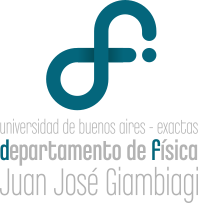  

©2021 [Víctor A. Bettachini](mailto:bettachini@df.uba.ar)  

---

## Enunciado
\\(N\\) partículas de masa \\(m\\) están equiespaciadas en una distancia \\(a\\).
Están sujetas a paredes mediante resortes de coeficiente de dureza \\(k\\) y longitud natural \\(l_0\\).
A su vez, en la dirección en que pueden desplazarse, están vinculadas por resortes con el mismo \\(k\\) pero de longitud natural \\(a > l_0\\).  
![](figuras/g-008.png)
1. Escriba la ecuación de movimiento para la partícula énésima.
	Indique todas las aproximaciones que realiza.
1. Proponga una solución adecuada y halle la relación de dispersión.
	¿Cuál es la frecuencia más baja posible?
1. Imponga las condiciones de contorno apropiadas para el sistema y calcule las frecuencias propias del mismo.
	Escriba la solución para el movimiento de cada partícula.
1. (*) Particularice para el caso \\(N = 2\\) y compare con el resultado que obtiene resolviendo el problema ``matricialmente''.
	Esquematice los modos normales de oscilación.

## Ecuación de movimiento para partícula \\(n\\)

### Potencial asociado a la partícula \\(n\\)

In [1]:
import sympy as sym
from sympy.physics import mechanics as mech
mech.init_vprinting() # notación con punto para la velocidad y punto punto para la aceleración
import warnings
warnings.filterwarnings("ignore")

In [2]:
t = sym.Symbol('t')
m, k, a, l_0 = sym.symbols('m, k, a, l_0', positive=True) # parámetros físicos

psi_nMinus = sym.Function('\Psi_{n-1}')(t)
psi_n = sym.Function('\psi_{n}')(t)
psi_nPlus = sym.Function('\psi_{n+1}')(t)

Las longitudes de los resortes son

In [3]:
l_superior = sym.sqrt(a**2 + psi_n**2)
l_inferior = sym.sqrt(a**2 + psi_n**2)
l_izquierdo = a + psi_n - psi_nMinus
l_derecho = a + psi_nPlus - psi_n

#### Resortes verticales y horizontales por separado

Para hacer las cosas más claras escribo el potencial de los resortes dispuestos verticalmente y horizontalmente por separado.
Comienzo con los verticales.

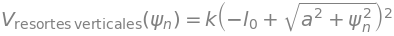

In [4]:
V_verticales = sym.Eq(sym.Function('V_\mathrm{resortes\,verticales}')(psi_n),
           k/2* (
               (l_superior - l_0 )**2 + (l_inferior - l_0 )**2
           ) 
          )
V_verticales

Ante un corrimiento **horizontal**, en \\(\hat{x}\\), desde la posición de equilibrio de la masa \\(n\\), \\(\psi_n\\), estos resortes orientados en sentido **vertical** ejercen en \\(\hat{x}\\) una

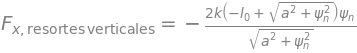

In [5]:
sym.Eq(sym.Symbol('F_{x, \mathrm{resortes\,verticales}}'), -V_verticales.rhs.diff(psi_n)  )

Si solo existieran estos resortes la dinámica estaría determinada por la 2.a ley de Newton

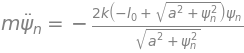

In [6]:
psi_n_2a_verticales = sym.Eq(m* psi_n.diff(t,2), -V_verticales.rhs.diff(psi_n) )
psi_n_2a_verticales

No tengo herramientas analíticas para resolver una ecuación diferencial no lineal (hay \\(\psi_n^2\\) involucrados).
Para resolverla la linealizo.
Hago esto con un desarrollo en serie en torno a la posición de equilibrio.

In [7]:
def maclaurin1erOrden(segundaLey):
    '''
    Desarrollo en serie de Taylor en torno al origen, o serie de Maclaurin, a primer orden en todas las variables.
    '''
    variables_set = segundaLey.atoms(sym.Function) # regresa un conjunto (set) de las funciones en la expresión  
    origenes = {variable : 0 for variable in variables_set} # diccionario de substituciones de cada variable por '0'
    segundaLey_rhs_1erOrden = segundaLey.rhs.subs(origenes) # Debe ser nula, sirve para verificar
    for variable in variables_set: 
        segundaLey_rhs_1erOrden += segundaLey.rhs.diff(variable).subs(origenes)* variable
    segundaLey_rhs_1erOrden = segundaLey_rhs_1erOrden.collect(variables_set) # collect agrupa lo que multiplica a su argumento
    return sym.Eq(segundaLey.lhs, segundaLey_rhs_1erOrden)

In [8]:
psi_n_2a1erOrden_verticales = maclaurin1erOrden(psi_n_2a_verticales)
psi_n_2a1erOrden_verticales

Otro tanto debo hacer con los resorten dispuestos **horizontalmente**

In [9]:
V_horizontales = sym.Eq(sym.Function('V_\mathrm{resortes\,horizontales}')(psi_n),
           k/2* (
               (l_izquierdo - a)**2 + (l_derecho - a)**2
           ) 
          )
V_horizontales

In [10]:
psi_n_2a_horizontales = sym.Eq(m* psi_n.diff(t,2), -V_horizontales.rhs.diff(psi_n) )
psi_n_2a_horizontales

No hubo necesidad de linealizar nada aquí por lo que la 2.a ley contemplando todos los resortes es

In [11]:
psi_n_2a1erOrden_separados = sym.Eq(m* psi_n.diff(t,2), psi_n_2a1erOrden_verticales.rhs + psi_n_2a_horizontales.rhs)
psi_n_2a1erOrden_separados

Que puede simplificarse en

In [12]:
psi_n_2a1erOrden_separados = sym.Eq(m* psi_n.diff(t,2), 
                                    (psi_n_2a1erOrden_verticales.rhs + psi_n_2a_horizontales.rhs).expand().collect(psi_n)
                                   )
psi_n_2a1erOrden_separados

#### Único potencial

Realmente no hay necesidad de separar por orientación los aportes al potencial.
De hecho pienso que además de poder traer confusión es sin duda más laborioso.

Resuelvo ahora partiendo del término del potencial del sistema que atañe a las fuerzas actuando sobre la partícula \\(n\\).

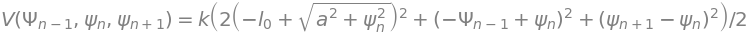

In [13]:
V = sym.Eq(sym.Function('V')(psi_nMinus, psi_n, psi_nPlus),
           k/2* (
               (l_izquierdo - a)**2 + (l_derecho - a)**2 +
               (l_superior - l_0 )**2 + (l_inferior - l_0 )**2
           ) 
          )
V

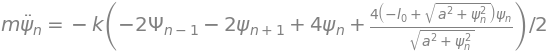

In [14]:
psi_n_2a = sym.Eq(m* psi_n.diff(t,2), -V.rhs.diff(psi_n) )
psi_n_2a

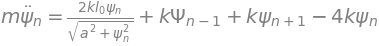

In [15]:
psi_n_2a = psi_n_2a.simplify()
psi_n_2a

Como discutí previamente, debo linealizar esta 2.a ley de Newton para desplazamientos desde la posición de equilibiro de la masa \\(n\\) en \\(\hat{x}\\).

In [16]:
psi_n_2a1erOrden = maclaurin1erOrden(psi_n_2a)
psi_n_2a1erOrden

Obteniendo idéntico resultado.

## Solución para la dinámica

Podemos probar con una solución como la del enunciado del problema anterior

In [17]:
A_p, n, k_p, alpha_p = sym.symbols(r'A^{(p)}, n, k^{(p)}, \alpha^{(p)}')
A_n = sym.Symbol('A_n')
A_n_p_enunciado = sym.Eq(A_n, A_p* sym.cos(n* k_p* a + alpha_p ) )
A_n_p_enunciado

In [18]:
omega, phi = sym.symbols(r'\omega^{(p)}, \phi^{(p)}')
psi_n_p = sym.Function('\psi_n^{(p)}')(t)
psi_n_p_enunciado = sym.Eq(psi_n_p , A_n_p_enunciado.rhs* sym.cos(omega * t + phi ) )
psi_n_p_enunciado

Una alternativa es re-escribir la parte espacial \\(A_n^{(p)}\\) con dos funciones trigonométricas

In [19]:
B_p, C_p = sym.symbols(r'B^{(p)}, C^{(p)}')
A_n_p_propuesta = sym.Eq(A_n, B_p*sym.sin(n*k_p*a )+  C_p*sym.cos(n*k_p*a ) )
A_n_p_propuesta

In [20]:
psi_n_p_propuesta = sym.Eq(psi_n_p , A_n_p_propuesta.rhs* sym.cos(omega * t + phi ) )
psi_n_p_propuesta

### Los número de onda \\(k^{(p)}\\) determinados por las condiciones de contorno

Si tal solución propuesta debe ser válida para toda \\(1\leq n\leq N\\) estoy forzado a imaginar que desde \\(n=1\\) se extiende a izquierda un resorte a \\(n= 0\\) y a derecha de \\(n= N\\) uno hasta \\(N= n+1\\).

Pero si mantengo \\(\psi_{n=0}= 0\\) como en el problema anterior, en que pensaba que \\(n= 0\\) estaba fija a una pared, la fuerza del resorte que la enlaza con la \\(n= 1\\) no respondería al dibujo del actual sistema.

La solución pasa por establecer que \\(\psi_{n= 0}= \psi_{n= 1}\\).
Y lo mismo para \\(\psi_{n= N}= \psi_{n= N+1}\\).
Esto es lo que posibilitaría imaginar que estos extremos son "libres" pero manteniendo la validez de la solución propuesta para toda \\(1\leq n\leq N\\).

Analizo solo la parte espacial de la solución

#### Parte espacial con fase

In [21]:
A_n_p_enunciado

A la izquierda del sistema

In [39]:
gauche= sym.Eq( A_n_p_enunciado.rhs.subs(n,0), A_n_p_enunciado.rhs.subs(n,1) )
gauche

Con la identidad trigonométrica
$$
\cos(a \pm b) = \cos(a) \cos(b) \mp \sin(a) \sin(b)
$$
puede obtenerse

In [73]:
def idCos(cos_a_pm_b):
    '''
    Calcula la identidad trigonométrica
    $\cos(a \pm b) = \cos(a) \cos(b) \mp \sin(a) \sin(b)'$
    
    >>> idCos(sym.cos(n* k_p* a + alpha_p )
    −sin(𝛼(𝑝))sin(𝑎𝑘(𝑝))+cos(𝛼(𝑝))cos(𝑎𝑘(𝑝))
    '''
    class noCoseno(Exception):
        pass
    if type(cos_a_pm_b == sym.cos):
        a = cos_a_pm_b.args[0] # argumento del coseno
        b = a.args[1]
        a = a.args[0]
        if type(gauche.rhs.args[1].args[0])==sym.core.add.Add: 
            return sym.cos(a)* sym.cos(b) - sym.sin(a)* sym.sin(b) # si el argumento del coseno es (a+b)
        else:
            return sym.cos(a)* sym.cos(b) + sym.sin(a)* sym.sin(b) # si el argumento del coseno es (a-b)
    else:
        raise noCoseno('No se ingresó un coseno.')

In [74]:
gaucheDesarmada= sym.Eq( gauche.lhs, (A_p* idCos(gauche.rhs.args[1] ) ).expand() )
gaucheDesarmada

Y de aquí

In [24]:
cosAlpha = sym.Eq(gauche.lhs/A_p * (1 - gauche.rhs.args[0]/ gauche.lhs) , gauche.rhs.args[1]/ A_p )
cosAlpha

En la derecha haremos lo mismo con la misma identidad.

In [25]:
N = sym.Symbol('N')
droit= sym.Eq( A_n_p_enunciado.rhs.subs(n,N), A_n_p_enunciado.rhs.subs(n, N+1) )
droit

In [78]:
droit_sinNPlus = sym.Eq( A_p* idCos(droit.lhs.args[1]), A_p* idCos(droit.rhs.args[1] ) ).expand()
droit_sinNPlus

En la que todavía hay que "desarmar" esas trigonométricas con \\((N+1)\\) a la izquierda de la igualdad.

In [80]:
droit_sinNPlus_redux = sym.Eq( droit_sinNPlus.lhs, A_p* idCos(droit.rhs.args[1] ) ).expand()
droit_sinNPlus_redux

#### Parte espacial con dos trigonométricas

In [28]:
A_n_p_propuesta

A la izquierda del sistema

In [29]:
jacobinos= sym.Eq( A_n_p_propuesta.rhs.subs(n,0), A_n_p_propuesta.rhs.subs(n,1) )
jacobinos

De aquí puede obtenerse que

In [30]:
B_p_jacobina= sym.Eq(A_n_p_propuesta.rhs.args[0], (jacobinos.rhs.args[1]- jacobinos.lhs).simplify() )
B_p_jacobina

En la derecha

In [31]:
N = sym.Symbol('N')
girondinos= sym.Eq( A_n_p_propuesta.rhs.subs(n,N), A_n_p_propuesta.rhs.subs(n,N+1) )
girondinos

Primero desarmo los términos con \\((N+1)\\) con identidades trigonométricas. Con
$$
\sin(a \pm b) = \sin(a) \cos(b) \pm \cos(a) \sin(b)
$$
se obtiene

In [32]:
girondinos_sinNPlus = sym.Eq(girondinos.rhs.args[0],
       (girondinos.lhs.args[0]* jacobinos.rhs.args[1] /C_p
        + girondinos.lhs.args[1]* jacobinos.rhs.args[0] /C_p
       ) )
girondinos_sinNPlus

y con
$$
\cos(a \pm b) = \cos(a) \cos(b) \mp \sin(a) \sin(b)
$$

In [33]:
girondinos_cosNPlus = sym.Eq(girondinos.rhs.args[1],
       (girondinos.lhs.args[1]* jacobinos.rhs.args[1]/C_p
        - girondinos.lhs.args[0]* jacobinos.rhs.args[0]* C_p/B_p**2
       ) )
girondinos_cosNPlus

Reemplazando en la ecuación para la derecha

In [34]:
girondinos_substituidos = girondinos.subs(girondinos_sinNPlus.lhs, girondinos_sinNPlus.rhs).subs(girondinos_cosNPlus.lhs, girondinos_cosNPlus.rhs) 
girondinos_substituidos

De aqui se tiene que